<a href="https://colab.research.google.com/github/srimoyee247/Amazonfoodreview/blob/main/Amazon_food_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply stop word removal to the 'text' column
data['Text'] = data['Text'].apply(remove_stop_words)

# Save the updated dataset
data.to_csv('updated_dataset.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df=pd.read_csv('/content/updated_dataset.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled Jumbo Salted Peanuts ....
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries . light , pillowy ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy great price . wide assortment yumm...


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Assuming the text data is in a column named 'text', preprocess it
def preprocess_text(text):
    # Add your preprocessing steps here
    # Example: Convert text to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the text column
df['Text'] = df['Text'].apply(preprocess_text)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the documents into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Print the TF-IDF vectors for the first few documents
for i in range(min(5, len(df))):
    print(f"Document {i+1}:", tfidf_matrix[i].toarray())


TF-IDF Matrix Shape: (568454, 120212)
Document 1: [[0. 0. 0. ... 0. 0. 0.]]
Document 2: [[0. 0. 0. ... 0. 0. 0.]]
Document 3: [[0. 0. 0. ... 0. 0. 0.]]
Document 4: [[0. 0. 0. ... 0. 0. 0.]]
Document 5: [[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Assuming the text data is in a column named 'Text', preprocess it
#funcation preprocess_text ( text)
#{
#text = text.lower()
##retrun text
#}
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the documents into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# Assuming 'df' is your pandas DataFrame containing the 'Text' column
# Convert the 'Text' column to lowercase
df['Text'] = df['Text'].str.lower()

# Initialize and fit TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_matrix, df['Score'], test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, Y_train, Y_test are defined properly
# Train Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Y_test, Y_pred, average='weighted')  # Choose appropriate average setting
print("Precision:", precision)

# Calculate recall
recall = recall_score(Y_test, Y_pred, average='weighted')  # Choose appropriate average setting
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred, average='weighted')  # Choose appropriate average setting
print("F1-score:", f1)

# Calculate ROC-AUC using one-vs-rest (ovr) strategy
roc_auc = roc_auc_score(Y_test, logistic_regression_model.predict_proba(X_test), multi_class='ovr')
print("ROC-AUC (ovr):", roc_auc)

# Calculate ROC-AUC using one-vs-one (ovo) strategy
roc_auc_ovo = roc_auc_score(Y_test, logistic_regression_model.predict_proba(X_test), multi_class='ovo')
print("ROC-AUC (ovo):", roc_auc_ovo)


TF-IDF Matrix Shape: (568454, 120212)
TF-IDF Matrix Shape: (568454, 120212)
(454763, 120212) (454763,)
(113691, 120212) (113691,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7379387990254286
Precision: 0.6996587050033113
Recall: 0.7379387990254286
F1-score: 0.705904902789764
ROC-AUC (ovr): 0.8781397319597165
ROC-AUC (ovo): 0.8294477286340033


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Assuming the text data is in a column named 'Text', preprocess it
#funcation preprocess_text ( text)
#{
#text = text.lower()
##retrun text
#}
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the documents into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# Assuming 'df' is your pandas DataFrame containing the 'Text' column
# Convert the 'Text' column to lowercase
df['Text'] = df['Text'].str.lower()

# Initialize and fit TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_matrix, df['Score'], test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_nb = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Calculate precision
precision_nb = precision_score(Y_test, Y_pred_nb, average='weighted')  # Choose appropriate average setting
print("Naive Bayes Precision:", precision_nb)

# Calculate recall
recall_nb = recall_score(Y_test, Y_pred_nb, average='weighted')  # Choose appropriate average setting
print("Naive Bayes Recall:", recall_nb)

# Calculate F1-score
f1_nb = f1_score(Y_test, Y_pred_nb, average='weighted')  # Choose appropriate average setting
print("Naive Bayes F1-score:", f1_nb)

# Naive Bayes doesn't have a direct method for calculating ROC-AUC,
# as it's primarily used for binary classification.
# However, you can apply One-vs-Rest (ovr) strategy for multiclass problems.
roc_auc_nb = roc_auc_score(Y_test, naive_bayes_model.predict_proba(X_test), multi_class='ovr')
print("Naive Bayes ROC-AUC (ovr):", roc_auc_nb)


TF-IDF Matrix Shape: (568454, 120212)
TF-IDF Matrix Shape: (568454, 120212)
(454763, 120212) (454763,)
(113691, 120212) (113691,)
Naive Bayes Accuracy: 0.6524527007414835
Naive Bayes Precision: 0.6494245170224521
Naive Bayes Recall: 0.6524527007414835
Naive Bayes F1-score: 0.5284086984423472
Naive Bayes ROC-AUC (ovr): 0.8103832214368902


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Assuming the text data is in a column named 'text', preprocess it
def preprocess_text(text):
    # Add your preprocessing steps here
    # Example: Convert text to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the text column
df['Text'] = df['Text'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the documents into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

# Train the classifier
mlp_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           1       0.63      0.72      0.67     10326
           2       0.39      0.19      0.25      5855
           3       0.44      0.28      0.34      8485
           4       0.49      0.28      0.36     16123
           5       0.81      0.94      0.87     72902

    accuracy                           0.74    113691
   macro avg       0.55      0.48      0.50    113691
weighted avg       0.70      0.74      0.71    113691



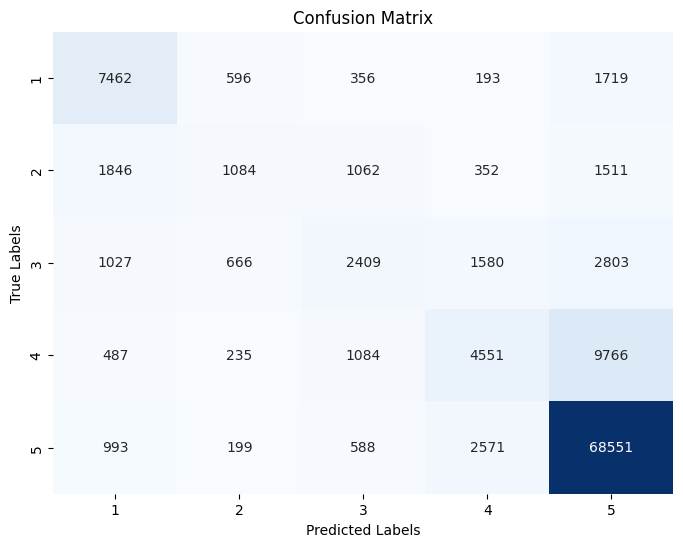

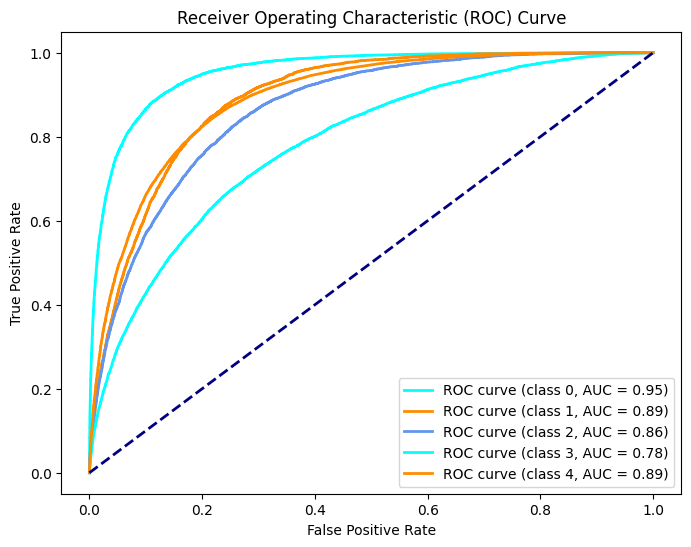

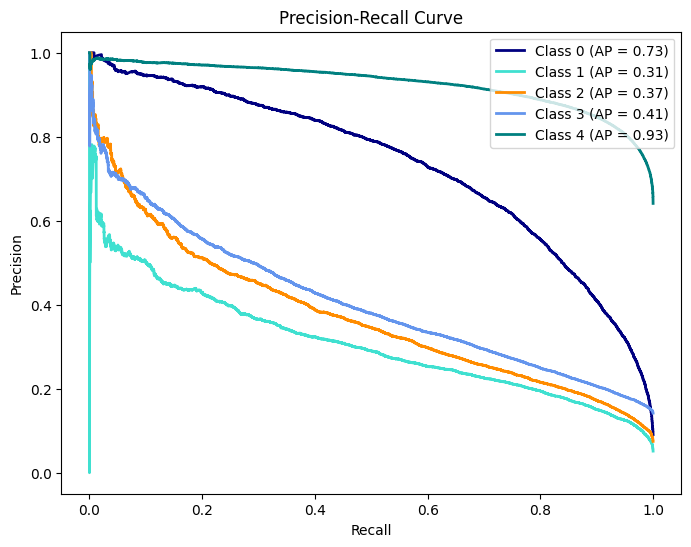

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, n_classes):
    y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot precision-recall curve
def plot_precision_recall_curve(y_true, y_pred_proba, n_classes):
    y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_binarized[:, i], y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_true_binarized[:, i], y_pred_proba[:, i])

    plt.figure(figsize=(8, 6))
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')
    plt.show()

# Number of classes
n_classes = len(np.unique(y_test))

# Predict probabilities for the test set
y_pred_proba = mlp_classifier.predict_proba(X_test_tfidf)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=np.unique(y_test))

# Plot ROC curve
plot_roc_curve(y_test, y_pred_proba, n_classes)

# Plot precision-recall curve
plot_precision_recall_curve(y_test, y_pred_proba, n_classes)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Assuming the text data is in a column named 'Text', preprocess it
def preprocess_text(text):
    # Add your preprocessing steps here
    # Example: Convert text to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the text column
df['Text'] = df['Text'].apply(preprocess_text)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the documents into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Score'], test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_model.predict(X_test)

# Constructing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


TF-IDF Matrix Shape: (568454, 120212)


KeyboardInterrupt: 